In [1]:
# Predictive Modeling of Data Science Job Salaries Across States Using Machine Learning

In [2]:
#Import the essential libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle

In [4]:
df = pd.read_csv('df.csv')

In [5]:
df.sample(5)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
3956,"Associate Scientist, Process Development & Man...",$53K - $98K (Glassdoor est.),2.2,BioBridge Global\n2.2,"San Antonio, TX",501 to 1000 Employees,2013,Nonprofit Organization,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$1 to $5 million (USD)
2481,"Scientist, Data",$12K-$112K (Glassdoor est.),3.6,Kubota Tractor Corporation\n3.6,"Grapevine, TX",1001 to 5000 employees,1971,Subsidiary or Business Segment,Industrial Manufacturing,Manufacturing,$2 to $5 billion (USD)
194,"Manager, Data Scientist Recommendations",$119K-$147K (Glassdoor est.),3.4,Tapestry\n3.4,"New York, NY",10000+ employees,2017,Company - Public,Other Retail Stores,Retail,Unknown / Non-Applicable
3209,Federal - Data Engineer - Senior,$102K-$179K (Glassdoor est.),4.2,Solekai Systems Corp\n4.2,"San Jose, CA",1 to 50 employees,2002,Company - Private,Computer Hardware & Software,Information Technology,$10 to $25 million (USD)
1269,Medical Laboratory Scientist - Nights,$73K-$136K (Glassdoor est.),4.1,Houston Methodist\n4.1,"Houston, TX",10000+ employees,1919,Nonprofit Organization,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
Job Title            5892 non-null object
Salary Estimate      5892 non-null object
Rating               5892 non-null float64
Company Name         5892 non-null object
Location             5892 non-null object
Size                 5892 non-null object
Founded              5892 non-null object
Type of ownership    5892 non-null object
Industry             5892 non-null object
Sector               5892 non-null object
Revenue              5892 non-null object
dtypes: float64(1), object(10)
memory usage: 506.4+ KB


In [7]:
#It seems that the given data-set needs to be clean as the following:
#We need to make a specific category of Job Title
#Our response variable seems to be the average salary, so we need to extract the minimum and maximum salary from the 
#Salary Estimate column and then calculate the average salary column based on
#We are going to classify the satisfaction based on salary
#We use the mean of salary for calssification
#Company Name must not be important in Salary Prediction
#The states name should be extract from the Location column
#The other columns may not affects our prediction

In [8]:
#Data Cleaning

In [9]:
df = df[df['Salary Estimate'] != '-1']

In [10]:
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [11]:
#remove $
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x:x.replace('$',' '))

In [12]:
#remove K
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x:x.replace('K',' '))

In [13]:
#remove texts
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x:x.replace('(Glassdoor est.)',' '))
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x:x.replace('(Employer est.)', ' '))

In [14]:
#Split Salary
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x:x.split())

In [15]:
df['min_salary'] = df['Salary Estimate'].apply(lambda x:x[0])
df['max_salary'] = df['Salary Estimate'].apply(lambda x:x[2])

In [16]:
#change min_salary and max_salary type to integer value and calculate the average salary
df['min_salary'] = df['min_salary'].astype(int)
df['max_salary'] = df['max_salary'].apply(lambda x:int(x))

df['average_salary'] = (df.min_salary + df.max_salary)/2

In [17]:
#Change the location column as State abriviation
df['Location'] = df['Location'].apply(lambda x:x.split())
df['Location'] = df['Location'].apply(lambda x:x[-1])
df = df[df.Location != 'Kingdom'] #to remove united kingdom

In [18]:
#make a function to categorize job title
def job_title(x):
    x = x.lower()
    if ('data scientist' in x) or ('data science' in x):
        return 'data scientist'
    elif 'data engineer' in x:
        return 'data engineer'
    elif 'deep learning' in x:
        return 'deep learning engineer'
    elif 'machine learning' in x:
        return 'machine learning engineer'
    elif 'director' in x:
        return 'director'
    elif 'manager' in x:
        return 'manager'
    elif 'analyst' in x:
        return 'analyst'
    elif 'researcher' in x:
        return 'researcher'
    else:
        return 'other'

In [19]:
df['Job Title'] = df['Job Title'].apply(job_title)

In [20]:
df = df[df['Rating'] != -1]

In [21]:
cleaned_df = df[['Job Title','Rating','average_salary','Location']]

In [22]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
Job Title         4891 non-null object
Rating            4891 non-null float64
average_salary    4891 non-null float64
Location          4891 non-null object
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


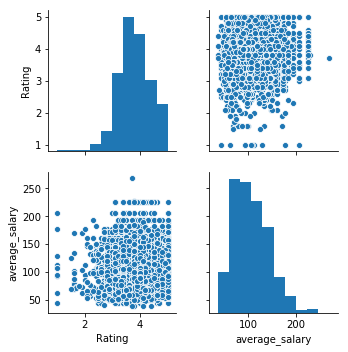

In [23]:
#Exploratory Data Analysis(EDA)
sns.pairplot(cleaned_df)

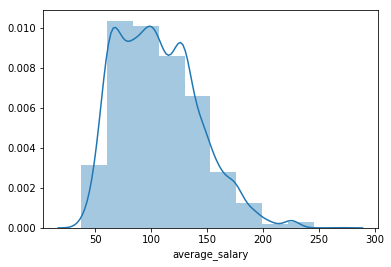

In [24]:
sns.distplot(cleaned_df['average_salary'],bins=10)

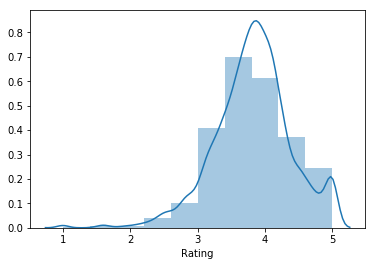

In [25]:
sns.distplot(cleaned_df['Rating'],bins=10)

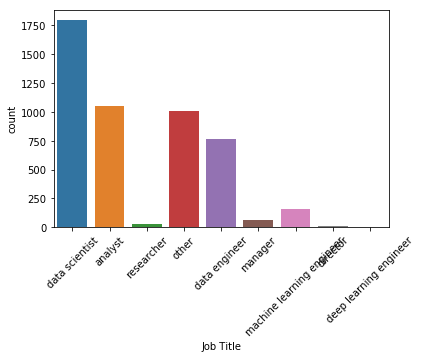

In [26]:
sns.countplot(x='Job Title',data=cleaned_df)
plt.xticks(rotation=45)
plt.show()

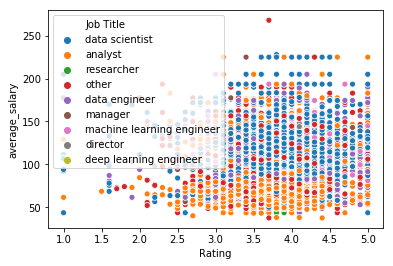

In [27]:
sns.scatterplot(x='Rating',y='average_salary', data=cleaned_df,hue='Job Title')

In [28]:
#Feature Engineering
preprocessed_df = pd.get_dummies(cleaned_df,columns=['Job Title','Location'])

In [29]:
preprocessed_df

,Rating,average_salary,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,...,Location_NC,Location_NH,Location_NJ,Location_NM,Location_NY,Location_OH,Location_PA,Location_TX,Location_VA,Location_WI
0,3.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3.4,146.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3.4,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2.9,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,4.4,146.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,5.0,146.0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,4.8,146.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,3.9,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,4.4,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [30]:
preprocessed_df['average_salary'].median()

102.0

In [31]:
def satisfaction(x):
    if x >= 102:
        return(1)
    else:
        return(0)

In [32]:
preprocessed_df['satisfaction'] = preprocessed_df['average_salary'].apply(satisfaction)

In [33]:
preprocessed_df[['average_salary','satisfaction']]

,average_salary,satisfaction
0,146.0,1
1,146.0,1
3,146.0,1
4,146.0,1
5,146.0,1
6,146.0,1
8,146.0,1
9,146.0,1
10,146.0,1
11,146.0,1


In [34]:
x = preprocessed_df.drop(['average_salary','satisfaction'],axis=1)
y = preprocessed_df['satisfaction']

In [35]:
#Modeling
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.4, random_state = 101)

In [36]:
log_model = LogisticRegression()

In [37]:
log_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
#prediction
predictions = log_model.predict(x_test)
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
#I want to check how accurately my model has predicted.
confusion_matrix(y_test,predictions)

array([[710, 238],
       [347, 662]])

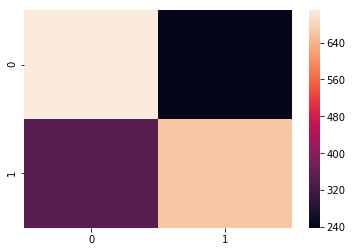

In [40]:
sns.heatmap(confusion_matrix(y_test,predictions),cbar=True)

In [41]:
accuracy_score(y_test,predictions,normalize=False)

1372

In [42]:
accuracy_score(y_test,predictions,normalize=True)

0.70107307102708227

In [43]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.67      0.75      0.71       948
          1       0.74      0.66      0.69      1009

avg / total       0.70      0.70      0.70      1957

